In [1]:
!pip3 install -Uqq fastai fastbook
import torch
torch.cuda.is_available()

True

In [2]:
# Download images
from fastbook import *
root = Path('imgs')
root.mkdir(exist_ok=True)
for q in ['forest', 'bird']:
    dest = Path(root/q)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{q} photos')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
verify_images(get_image_files(root)).map(Path.unlink)

(#6) [None,None,None,None,None,None]

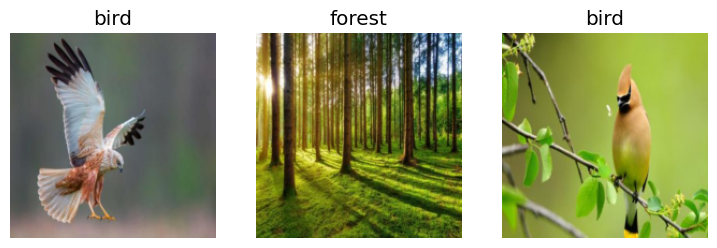

In [4]:
# Load data
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(root)
dls.show_batch(max_n=3)

In [5]:
# Train
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.785152,0.519955,0.191781,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.047218,0.059225,0.013699,00:01
1,0.028127,0.011212,0.013699,00:01
2,0.018371,0.004683,0.000000,00:01


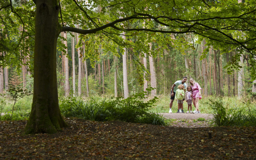

This is a forest. 0.0138 bird.


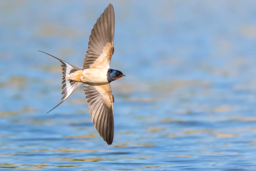

This is a bird. 1.0000 bird.


In [6]:
# Test
download_images(root, urls=[
    'https://base-prod.rspb-prod.magnolia-platform.com/.imaging/focalpoint/_WIDTH_x_HEIGHT_/dam/jcr:71eda09d-9010-474a-8404-cba78c2489d6/654943777-Species-Swallow-flying-over-water.jpg',
    'https://www.forestryengland.uk/sites/default/files/styles/list_image_large_2x/public/media/Salcey045_FE.jpg?h=613e967f&itok=nJ_qtplW'
], preserve_filename=True)
for im in get_image_files(root)[:2]:
    is_bird, _, probs = learn.predict(PILImage.create(im))
    display(Image.open(im).to_thumb(256, 256))
    print(f'This is a {is_bird}. {probs[0]:.4f} bird.')